In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

In [45]:
df = pd.read_csv(r"C:\Users\karun\OneDrive\Desktop\edai2.csv")
df.head()

,job,Temperature stream 1,Pressure stream 1,Temperature stream 2,Pressure stream 2,Temperature of reactor_1,Temperature of reactor2,Mole fraction Methanol stream 18
0,1,30,10,15,10,200,16,0.484746
1,2,40,10,15,10,200,16,0.484746
2,3,50,10,15,10,200,16,0.484746
3,4,30,20,15,10,200,16,0.484746
4,5,40,20,15,10,200,16,0.484746


In [46]:
df.shape

(1440, 8)

In [47]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1440 entries, 0 to 1439
Data columns (total 8 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   job                               1440 non-null   int64  
 1   Temperature stream 1              1440 non-null   int64  
 2   Pressure stream 1                 1440 non-null   int64  
 3   Temperature stream 2              1440 non-null   int64  
 4   Pressure stream 2                 1440 non-null   int64  
 5   Temperature of reactor_1          1440 non-null   int64  
 6   Temperature of reactor2           1440 non-null   int64  
 7   Mole fraction Methanol stream 18  1440 non-null   float64
dtypes: float64(1), int64(7)
memory usage: 90.1 KB


In [48]:
df.duplicated()


0       False
1       False
2       False
3       False
4       False
        ...  
1435    False
1436    False
1437    False
1438    False
1439    False
Length: 1440, dtype: bool

In [49]:
df.columns

Index(['job', 'Temperature stream 1', 'Pressure stream 1',
       'Temperature stream 2', 'Pressure stream 2', 'Temperature of reactor_1',
       'Temperature of reactor2', 'Mole fraction Methanol stream 18'],
      dtype='object')

In [50]:
df.describe()


,job,Temperature stream 1,Pressure stream 1,Temperature stream 2,Pressure stream 2,Temperature of reactor_1,Temperature of reactor2,Mole fraction Methanol stream 18
count,1440.00000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000
mean,725.58125,40.000000,19.812500,25.000000,19.812500,210.187500,26.000000,0.484256
std,421.30967,10.386887,10.339927,10.386887,10.339927,10.339927,10.341628,0.001973
min,1.00000,25.000000,5.000000,10.000000,5.000000,195.000000,11.000000,0.482724
25%,360.75000,30.000000,10.000000,15.000000,10.000000,200.000000,16.000000,0.483132
50%,720.50000,40.000000,20.000000,25.000000,20.000000,210.000000,26.000000,0.483942
75%,1089.25000,50.000000,30.000000,35.000000,30.000000,220.000000,36.000000,0.484746
max,1458.00000,55.000000,35.000000,40.000000,35.000000,225.000000,41.000000,0.497792


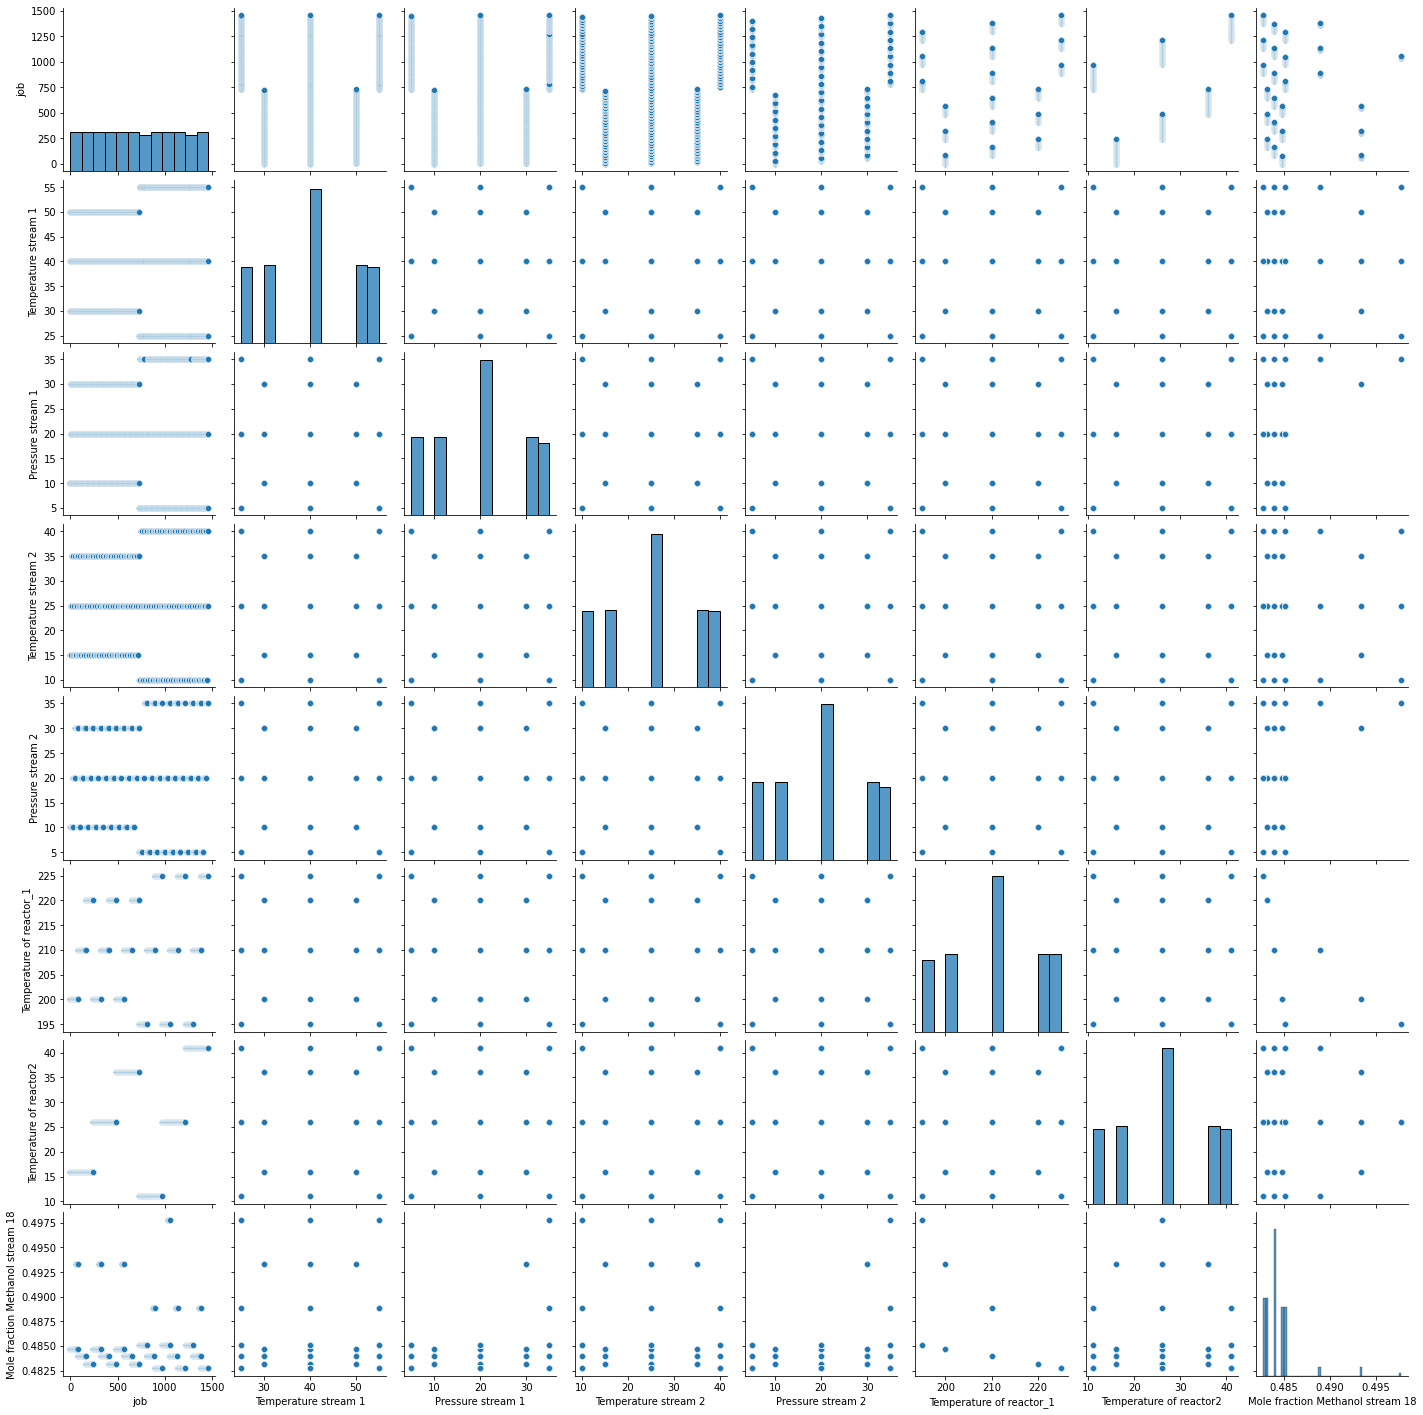

In [67]:
sns.pairplot(df)

<AxesSubplot:>

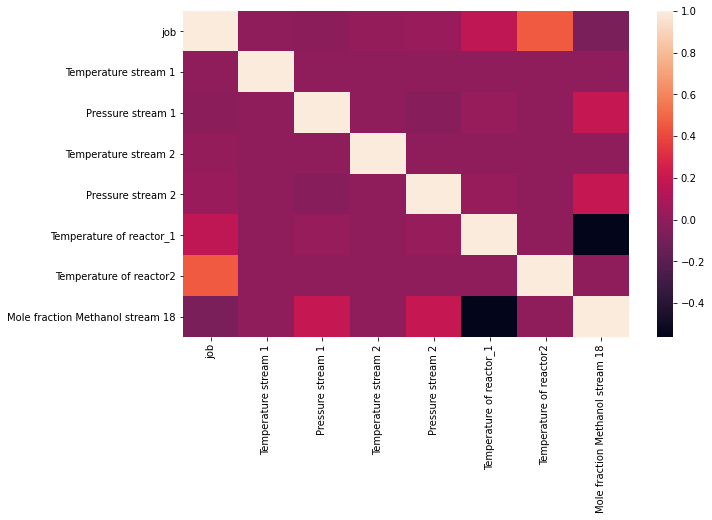

In [52]:
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(df.corr())

In [53]:
X = pd.DataFrame(df, columns = ['Temperature of reactor_1','Temperature of reactor2','Pressure stream 1','Pressure stream 2','Temperature stream 1','Temperature stream 2'])

In [54]:
#X = df.drop("Mole fraction Methanol stream 18", axis=1)
#X = pd.DataFrame(df, columns = ['Temperature of reactor_1'])
y = df["Mole fraction Methanol stream 18"]

In [55]:
X.head(3)

,Temperature of reactor_1,Temperature of reactor2,Pressure stream 1,Pressure stream 2,Temperature stream 1,Temperature stream 2
0,200,16,10,10,30,15
1,200,16,10,10,40,15
2,200,16,10,10,50,15


In [56]:
y.head(3)

0    0.484746
1    0.484746
2    0.484746
Name: Mole fraction Methanol stream 18, dtype: float64

In [57]:
from sklearn.model_selection import train_test_split

x_train , x_test, y_train ,y_test = train_test_split(X,y,test_size = 0.3)

In [58]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(x_train,y_train)
pred = regr.predict(x_test)

In [59]:
from sklearn import metrics

from sklearn.metrics import mean_squared_error

print(np.sqrt(metrics.mean_squared_error(y_test ,pred)))

0.0015878969765198976


In [60]:
from sklearn.metrics import r2_score
print("r2_score",r2_score(y_test,pred))

r2_score 0.3979984254001725


In [61]:
print(regr.coef_)

[-1.09426610e-04 -2.83659026e-06  4.06919501e-05  4.09547082e-05
 -3.94915328e-06  1.20020382e-06]


In [83]:
# Equation of MLR
print('+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ ')
print('                                                                ')
Ym = 'Ym =  -1.09426610e-04 Temperature of reactor_1  -2.83659026e-06 Temperature of reactor2 + 4.06919501e-05 Pressure stream 1 +   4.09547082e-05 Pressure stream 2  -3.94915328e-06 Temperature stream 1 + 1.20020382e-06 Temperature stream 2'

print(Ym)
print('                                                                ')
print('+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ ')

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ 
                                                                
Ym =  -1.09426610e-04 Temperature of reactor_1  -2.83659026e-06 Temperature of reactor2 + 4.06919501e-05 Pressure stream 1 +   4.09547082e-05 Pressure stream 2  -3.94915328e-06 Temperature stream 1 + 1.20020382e-06 Temperature stream 2
                                                                
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ 


In [63]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
  
 # create regressor object
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
  
# fit the regressor with x and y data
regressor.fit(x_train,y_train)  

RandomForestRegressor(random_state=0)

In [64]:
Y_pred = regressor.predict(x_test)  # test the output by changing values
Y_pred

array([0.48514563, 0.48394233, 0.48394217, 0.48474616, 0.48313164,
       0.48394216, 0.48272433, 0.4831316 , 0.48272432, 0.48514567,
       0.48514571, 0.48887248, 0.48474621, 0.4851455 , 0.48514566,
       0.48474618, 0.48474621, 0.48272429, 0.48313163, 0.48272434,
       0.48394217, 0.48394223, 0.48313158, 0.4831316 , 0.4831316 ,
       0.48394228, 0.4831316 , 0.48394234, 0.48514563, 0.48313158,
       0.48313163, 0.48394219, 0.48313165, 0.48514569, 0.48394217,
       0.4831316 , 0.4827242 , 0.48272419, 0.48394216, 0.49334984,
       0.48272434, 0.48394219, 0.4827242 , 0.48514563, 0.48514568,
       0.48313162, 0.48514561, 0.48313163, 0.48313161, 0.48394218,
       0.48394219, 0.48474622, 0.4851457 , 0.48514566, 0.48394218,
       0.48514558, 0.48394215, 0.48313166, 0.48394222, 0.48272437,
       0.48272419, 0.48514564, 0.48313164, 0.49334984, 0.48394233,
       0.48514554, 0.48474618, 0.48313161, 0.48394217, 0.48394219,
       0.48394229, 0.48272441, 0.48313162, 0.48394217, 0.48272

In [65]:
from sklearn.metrics import mean_absolute_error
print('MAE: ', mean_absolute_error(y_test, Y_pred))
print('MSE: ', mean_squared_error(y_test,  Y_pred)) 
r2 = r2_score(y_test, Y_pred)
print('R2 : ' , r2)


MAE:  2.809235697881701e-07
MSE:  9.146611985268436e-12
R2 :  0.9999978161980995


In [90]:
#Temperature of reactor_1,Temperature of reactor2,Pressure stream 1,Pressure stream 2,Temperature stream 1,Temperature stream 2
print(regressor.predict([[100, 100, 58.5, 58.5,40,25]]))

[0.49774767]
